Fraud is one of the major issues we come up majorly in banks, life insurance, health insurance, and many others. These major frauds are dependent on the person who is trying to sell you the fake product or service, if you are matured enough to decide what is wrong then you will never get into any fraud transactions. But one such fraud that has been increasing a lot these days is fraud in making payments.

payment_fraud.csv

Write a classification program and compare various classification algorithms using payment_fraud.csv dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [2]:
fraud = pd.read_csv("payment_fraud.csv")
fraud

accountAgeDays  numItems  localTime paymentMethod  \
0                  29         1   4.745402        paypal   
1                 725         1   4.742303   storecredit   
2                 845         1   4.921318    creditcard   
3                 503         1   4.886641    creditcard   
4                2000         1   5.040929    creditcard   
...               ...       ...        ...           ...   
39216             986         1   4.836982    creditcard   
39217            1647         1   4.876771    creditcard   
39218            1591         1   4.742303    creditcard   
39219             237         1   4.921318    creditcard   
39220             272         1   5.040929        paypal   

       paymentMethodAgeDays  label  
0                 28.204861      0  
1                  0.000000      0  
2                  0.000000      0  
3                  0.000000      0  
4                  0.000000      0  
...                     ...    ...  
39216              0.000000      0  
39217            377.930556      0  
39218              0.000000      0  
39219            236.082639      0  
39220              0.000694      0  

[39221 rows x 6 columns]

In [3]:
print(fraud.dtypes)

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
label                     int64
dtype: object


In [4]:
fraud.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

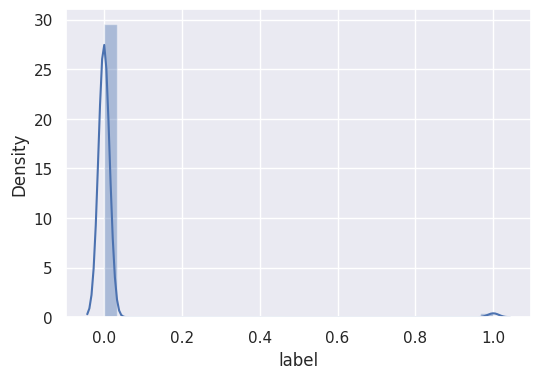

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(fraud['label'], bins=30)
plt.show()

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraud['paymentMethod'] = label_encoder.fit_transform(fraud['paymentMethod'])
#x=fraud.drop(['label'], axis=1)
fraud.head(20)

accountAgeDays  numItems  localTime  paymentMethod  paymentMethodAgeDays  \
0               29         1   4.745402              1             28.204861   
1              725         1   4.742303              2              0.000000   
2              845         1   4.921318              0              0.000000   
3              503         1   4.886641              0              0.000000   
4             2000         1   5.040929              0              0.000000   
5              119         1   4.962055              1              0.000000   
6             2000         1   4.921349              1              0.000000   
7              371         1   4.876771              0              0.000000   
8             2000         1   4.748314              0              0.000000   
9                4         1   4.461622              0              0.000000   
10              26         1   4.745402              1              0.000000   
11            2000         1   4.505662              0              0.000694   
12               3         1   4.962055              0              2.690972   
13               3         1   4.921318              0              2.069444   
14              23         1   4.745402              0              0.001389   
15               5         1   4.921349              1              4.036111   
16            1208         1   4.836982              0              0.000694   
17              11         1   4.921349              0             10.865972   
18             123         1   4.748314              0              0.000694   
19            2000         1   4.895263              0            248.774306   

    label  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  
10      0  
11      0  
12      0  
13      0  
14      0  
15      0  
16      0  
17      0  
18      0  
19      0

In [7]:
X = fraud[["accountAgeDays", "numItems", "localTime", "paymentMethod", "paymentMethodAgeDays"]].copy()
y = fraud[["label"]].copy()


In [8]:
X

accountAgeDays  numItems  localTime  paymentMethod  \
0                  29         1   4.745402              1   
1                 725         1   4.742303              2   
2                 845         1   4.921318              0   
3                 503         1   4.886641              0   
4                2000         1   5.040929              0   
...               ...       ...        ...            ...   
39216             986         1   4.836982              0   
39217            1647         1   4.876771              0   
39218            1591         1   4.742303              0   
39219             237         1   4.921318              0   
39220             272         1   5.040929              1   

       paymentMethodAgeDays  
0                 28.204861  
1                  0.000000  
2                  0.000000  
3                  0.000000  
4                  0.000000  
...                     ...  
39216              0.000000  
39217            377.930556  
39218              0.000000  
39219            236.082639  
39220              0.000694  

[39221 rows x 5 columns]

In [9]:
y

label
0          0
1          0
2          0
3          0
4          0
...      ...
39216      0
39217      0
39218      0
39219      0
39220      0

[39221 rows x 1 columns]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(27454, 5)
(11767, 5)
(27454, 1)
(11767, 1)


Linear regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
Y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 0.11332552412363758
R2 score is 0.018268432021919523


Ridge regression

In [13]:
ridge = Ridge()
ridge.fit(X_train, Y_train)

Ridge()

In [14]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)

pred_train_rr= rr.predict(X_train)
print('RMSE of Training data:',np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print('R2 of Training data:',r2_score(Y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('RMSE of Test data:',np.sqrt(mean_squared_error(Y_test,pred_test_rr)))
print('R2 of Test data:',r2_score(Y_test, pred_test_rr))

RMSE of Training data: 0.11905681114230592
R2 of Training data: 0.022377662090401595
RMSE of Test data: 0.11332552377060669
R2 of Test data: 0.018268438138486554


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
X = fraud.iloc[:,0:6]
Y = fraud['paymentMethodAgeDays']

ridge_model = Ridge(alpha=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(ridge_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.000 (0.000)


lasso regression

In [16]:
lasso = Lasso()
lasso.fit(X_train, Y_train)

Lasso()

In [17]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(lasso_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.002 (0.000)


In [18]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train)
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso)))
print(r2_score(Y_test, pred_test_lasso))

0.1193833302339622
0.01700795526902943
0.11351250700457433
0.015026118559860802


### paymethod converted to dummies

In [19]:
X = fraud[["accountAgeDays", "numItems", "localTime", "paymentMethod", "paymentMethodAgeDays"]].copy()
y = fraud[["label"]].copy()

In [20]:
X_encoded = pd.get_dummies(X,columns=['paymentMethod'])
X_encoded

accountAgeDays  numItems  localTime  paymentMethodAgeDays  \
0                  29         1   4.745402             28.204861   
1                 725         1   4.742303              0.000000   
2                 845         1   4.921318              0.000000   
3                 503         1   4.886641              0.000000   
4                2000         1   5.040929              0.000000   
...               ...       ...        ...                   ...   
39216             986         1   4.836982              0.000000   
39217            1647         1   4.876771            377.930556   
39218            1591         1   4.742303              0.000000   
39219             237         1   4.921318            236.082639   
39220             272         1   5.040929              0.000694   

       paymentMethod_0  paymentMethod_1  paymentMethod_2  
0                    0                1                0  
1                    0                0                1  
2                    1                0                0  
3                    1                0                0  
4                    1                0                0  
...                ...              ...              ...  
39216                1                0                0  
39217                1                0                0  
39218                1                0                0  
39219                1                0                0  
39220                0                1                0  

[39221 rows x 7 columns]

In [21]:
y

label
0          0
1          0
2          0
3          0
4          0
...      ...
39216      0
39217      0
39218      0
39219      0
39220      0

[39221 rows x 1 columns]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X_encoded, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(27454, 7)
(11767, 7)
(27454, 1)
(11767, 1)


Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 0.11879991145037047
R2 score is 0.020138845481275203


Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)

pred_train_rr= rr.predict(X_train)
print('RMSE of Training data:',np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print('R2 of Training data:',r2_score(Y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('RMSE of Test data:',np.sqrt(mean_squared_error(Y_test,pred_test_rr)))
print('R2 of Test data:',r2_score(Y_test, pred_test_rr))

RMSE of Training data: 0.11674900406555894
R2 of Training data: 0.02172304166007577
RMSE of Test data: 0.11879991113591606
R2 of Test data: 0.020138850668512287


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
X = fraud.iloc[:,0:6]
Y = fraud['paymentMethodAgeDays']

ridge_model = Ridge(alpha=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(ridge_model, X_encoded, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.032 (0.001)


Lasso Regression

In [27]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train)
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso)))
print(r2_score(Y_test, pred_test_lasso))

0.11706268635461409
0.016459092624086735
0.11901306152908142
0.0166195693291028


In [28]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(lasso_model, X_encoded, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.030 (0.001)


### Lasso regression is accepted as it has less value compare to both linear and ridge regression